In [19]:
import ssl
import certifi
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd
import numpy as np

context = ssl.create_default_context(cafile=certifi.where())
url = "https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.zip"

with urlopen(url, context=context) as response:
    with ZipFile(BytesIO(response.read())) as myzip:
        with myzip.open('eurofxref-hist.csv') as myfile:
            df = pd.read_csv(myfile)

In [20]:
df

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2024-03-26,1.0855,164.40,1.9558,NaN,25.277,7.4590,NaN,0.85846,395.45,...,90.4365,1455.75,18.1165,5.1236,1.8036,61.055,1.4595,39.415,20.5294,NaN
1,2024-03-25,1.0835,163.78,1.9558,NaN,25.266,7.4585,NaN,0.85698,396.17,...,90.3680,1453.39,18.1374,5.1195,1.8046,60.920,1.4573,39.364,20.4889,NaN
2,2024-03-22,1.0823,163.74,1.9558,NaN,25.371,7.4581,NaN,0.85795,396.30,...,90.4090,1453.62,18.1372,5.1274,1.8020,60.928,1.4593,39.298,20.5597,NaN
3,2024-03-21,1.0907,164.96,1.9558,NaN,25.243,7.4579,NaN,0.85678,393.35,...,90.6560,1449.01,18.2610,5.1424,1.7963,61.033,1.4619,39.396,20.4181,NaN
4,2024-03-20,1.0844,164.54,1.9558,NaN,25.289,7.4572,NaN,0.85438,395.33,...,90.2400,1453.86,18.2541,5.1379,1.7976,60.978,1.4579,39.244,20.4589,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855,NaN
6459,1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283,NaN
6460,1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307,NaN
6461,1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975,NaN


In [21]:
df['EUR'] = float(1)
g10_currencies = ['EUR', 'USD', 'JPY', 'GBP', 'CHF', 'CAD', 'AUD', 'NZD', 'NOK', 'SEK']
df_filtered = df[g10_currencies].copy()
df_filtered.dropna(inplace=True)
for currency in g10_currencies:
    df_filtered[f'Inverse_{currency}'] = 1 / df_filtered[currency]
df_filtered.loc[df_filtered.index.max() + 1] = [1] * (len(g10_currencies) * 2)
df_filtered['Date'] = df['Date']
df_filtered.sort_index(ascending=False, inplace=True)
start_date = '1999-01-04'
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered.set_index('Date', inplace=True)
df_filtered = df_filtered[df_filtered.index >= start_date]
num_assets = len(g10_currencies)
initial_weights = 1 / num_assets
index = pd.Series(index=df_filtered.index)
for i in range(len(df_filtered)):
    index.iloc[i] = df_filtered.iloc[i].multiply(initial_weights).sum()
df_filtered['IND'] = index

/var/folders/jz/50nnnp812c90rg_0r1fc2l500000gn/T/ipykernel_93076/1411270807.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  index = pd.Series(index=df_filtered.index)


In [22]:
df_filtered

,EUR,USD,JPY,GBP,CHF,CAD,AUD,NZD,NOK,SEK,...,Inverse_USD,Inverse_JPY,Inverse_GBP,Inverse_CHF,Inverse_CAD,Inverse_AUD,Inverse_NZD,Inverse_NOK,Inverse_SEK,IND
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.0,1.1789,133.73,0.71110,1.6168,1.8004,1.9100,2.2229,8.8550,9.4696,...,0.848248,0.007478,1.406272,0.618506,0.555432,0.523560,0.449863,0.112931,0.105601,16.812259
1999-01-05,1.0,1.1790,130.96,0.71220,1.6123,1.7965,1.8944,2.2011,8.7745,9.4025,...,0.848176,0.007636,1.404100,0.620232,0.556638,0.527872,0.454318,0.113967,0.106355,16.517179
1999-01-06,1.0,1.1743,131.42,0.70760,1.6116,1.7711,1.8820,2.1890,8.7335,9.3050,...,0.851571,0.007609,1.413228,0.620501,0.564621,0.531350,0.456830,0.114502,0.107469,16.546178
1999-01-07,1.0,1.1632,129.43,0.70585,1.6165,1.7602,1.8474,2.1531,8.6295,9.1800,...,0.859697,0.007726,1.416732,0.618620,0.568117,0.541301,0.464447,0.115882,0.108932,16.318720
1999-01-08,1.0,1.1659,130.09,0.70940,1.6138,1.7643,1.8406,2.1557,8.5900,9.1650,...,0.857706,0.007687,1.409642,0.619655,0.566797,0.543301,0.463886,0.116414,0.109111,16.378890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20,1.0,1.0844,164.54,0.85438,0.9658,1.4736,1.6633,1.7976,11.5725,11.3595,...,0.922169,0.006078,1.170439,1.035411,0.678610,0.601214,0.556297,0.086412,0.088032,20.245574
2024-03-21,1.0,1.0907,164.96,0.85678,0.9766,1.4736,1.6535,1.7963,11.5430,11.3645,...,0.916842,0.006062,1.167161,1.023961,0.678610,0.604778,0.556700,0.086633,0.087993,20.284372
2024-03-22,1.0,1.0823,163.74,0.85795,0.9729,1.4688,1.6601,1.8020,11.6170,11.4025,...,0.923958,0.006107,1.165569,1.027855,0.680828,0.602373,0.554939,0.086081,0.087700,20.173896


In [23]:
import pandas as pd
import matplotlib.pyplot as plt


g10_currencies = ['EUR', 'USD', 'JPY', 'GBP', 'CHF', 'CAD', 'AUD', 'NZD', 'NOK', 'SEK']
g10_data = df[g10_currencies]
num_assets = len(g10_currencies)
initial_weights = pd.Series(1 / num_assets, index=g10_currencies)
currency_excess_returns = g10_data.pct_change().subtract(index_returns, axis=0)
weight_evolution = initial_weights.multiply(currency_excess_returns, axis=0).cumsum(axis=0)
weight_evolution = weight_evolution.reindex(df.index)



plt.figure(figsize=(10, 6))
for currency in g10_currencies:
    plt.plot(weight_evolution[currency],label=currency)

plt.title('Weight Evolution Over Time for G10 Currencies')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'index_returns' is not defined

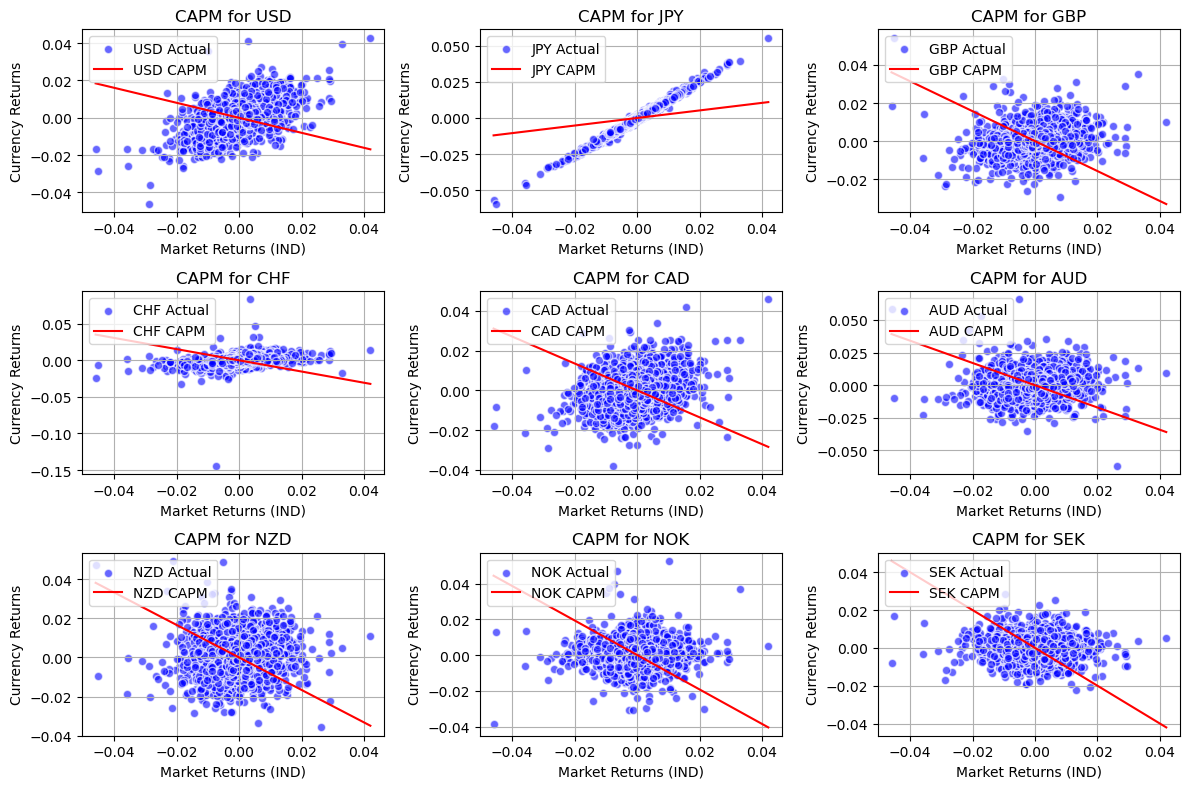

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

log_returns = df_filtered.drop(columns=['EUR']).pct_change().dropna()
market_returns = df_filtered['IND'].pct_change().dropna()
capm_results = {}
for currency in log_returns.columns:
    excess_returns = log_returns[currency] - market_returns
    X = sm.add_constant(market_returns)
    y = excess_returns
    model = sm.OLS(y, X).fit()
    capm_results[currency] = model.params
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.ravel()
for i in range(9):
    currency = log_returns.columns[i]
    ax = axes[i]
    ax.scatter(market_returns, log_returns[currency], color='blue', label=f'{currency} Actual', alpha=0.6, edgecolors='w')
    x_fit = np.linspace(market_returns.min(), market_returns.max(), 100)
    y_fit = capm_results[currency][0] + capm_results[currency][1] * x_fit
    
    ax.plot(x_fit, y_fit, color='red', label=f'{currency} CAPM')
    
    ax.set_title(f'CAPM for {currency}')
    ax.set_xlabel('Market Returns (IND)')
    ax.set_ylabel('Currency Returns')
    ax.legend(loc='upper left')
    ax.grid(True)
    
plt.tight_layout()
plt.show()

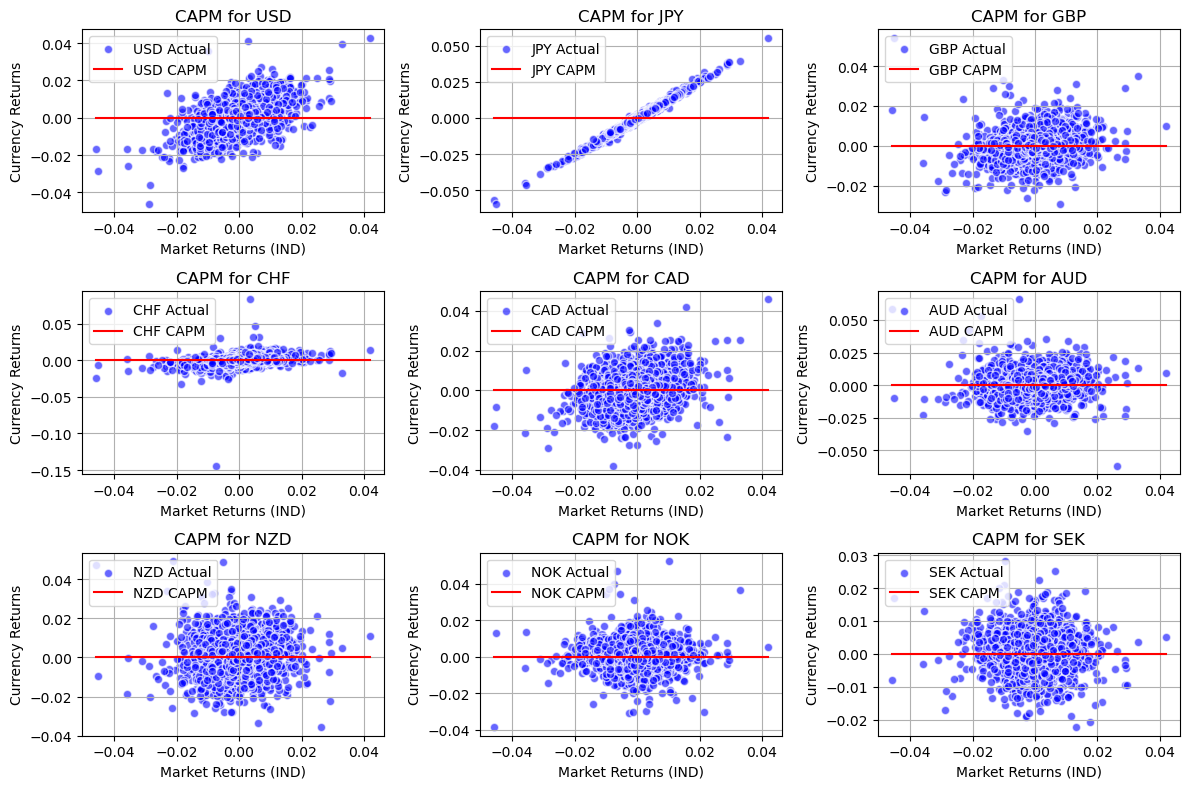

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

log_returns = df_filtered.drop(columns=['EUR']).pct_change().dropna()
market_returns = df_filtered['IND'].pct_change().dropna()
capm_results = {}
for currency in log_returns.columns:
    excess_returns = log_returns[currency] - market_returns
    X = sm.add_constant(market_returns)
    y = excess_returns
    model = sm.OLS(y, X-1).fit()
    capm_results[currency] = model.params
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.ravel()
for i in range(9):
    currency = log_returns.columns[i]
    ax = axes[i]
    ax.scatter(market_returns, log_returns[currency], color='blue', label=f'{currency} Actual', alpha=0.6, edgecolors='w')
    x_fit = np.linspace(market_returns.min(), market_returns.max(), 100)
    y_fit = capm_results[currency][0] + capm_results[currency][1] * x_fit
    
    ax.plot(x_fit, y_fit, color='red', label=f'{currency} CAPM')
    
    ax.set_title(f'CAPM for {currency}')
    ax.set_xlabel('Market Returns (IND)')
    ax.set_ylabel('Currency Returns')
    ax.legend(loc='upper left')
    ax.grid(True)
    
plt.tight_layout()
plt.show()